In [3]:
!git clone --quiet https://github.com/qubvel/classification_models.git
!pip install image-classifiers >/dev/null 2>&1
!pip install keras_applications >/dev/null 2>&1
!pip install keras_preprocessing >/dev/null 2>&1
!mv classification_models/classification_models ./classification_models1
!mv classification_models/* .
!rm -rf classification_models
!mv classification_models1 classification_models

fatal: destination path 'classification_models' already exists and is not an empty directory.
mv: cannot stat 'classification_models/classification_models': No such file or directory
mv: cannot stat 'classification_models1': No such file or directory


In [0]:
from keras.layers import Dense, Activation
from keras.models import Model
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import load_model
from keras import optimizers
from keras import losses
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # Filter Info + Warning Logs, Show errors

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [6]:
y_train = to_categorical(y_train, 10, dtype='float32')
print("Categorical labels: ", y_train[0])
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

Categorical labels:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
# Run this cell 2 times
from classification_models.resnet import ResNet18, preprocess_input
resnet18 = ResNet18((32, 32, 3), weights='imagenet')

In [0]:
# Modifying Model
fc_last = Dense(10, name='fc_last')(resnet18.layers[-3].output)
fc_act = Activation('softmax', name='softmax')(fc_last)
f_resnet = Model(resnet18.input, fc_act)

In [0]:
for layer in resnet18.layers[:-15]:
    layer.trainable = False
    
for layer in resnet18.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f90519ba320> False
<keras.layers.normalization.BatchNormalization object at 0x7f9051928898> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7f9051a02ef0> False
<keras.layers.convolutional.Conv2D object at 0x7f90518aa0f0> False
<keras.layers.normalization.BatchNormalization object at 0x7f9051819b70> False
<keras.layers.core.Activation object at 0x7f9051819be0> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7f9051819c50> False
<keras.layers.pooling.MaxPooling2D object at 0x7f9051854cc0> False
<keras.layers.normalization.BatchNormalization object at 0x7f90517b24a8> False
<keras.layers.core.Activation object at 0x7f90516ef7b8> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7f905171c550> False
<keras.layers.convolutional.Conv2D object at 0x7f90516d62b0> False
<keras.layers.normalization.BatchNormalization object at 0x7f905164b5c0> False
<keras.layers.core.Activation object at 0x7f905164beb8> False
<keras

In [0]:
f_resnet.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_19 (ZeroPadding2 (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_19[0][0]          
__________________________________________________________________________________________________
bn0 (Batch

In [0]:
 f_resnet.compile(optimizer='Adam', metrics=['accuracy'], loss=losses.categorical_crossentropy)

W0630 06:08:23.145456 140260707006336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
f_resnet.fit(x_train, y_train, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 26s 510us/step - loss: 0.6540 - acc: 0.7654
Epoch 2/10
50000/50000 [==============================] - 25s 507us/step - loss: 0.6402 - acc: 0.7728
Epoch 3/10
50000/50000 [==============================] - 25s 500us/step - loss: 0.6277 - acc: 0.7766
Epoch 4/10
50000/50000 [==============================] - 25s 500us/step - loss: 0.6242 - acc: 0.7778
Epoch 5/10
50000/50000 [==============================] - 26s 511us/step - loss: 0.6066 - acc: 0.7840
Epoch 6/10
50000/50000 [==============================] - 26s 524us/step - loss: 0.5986 - acc: 0.7864
Epoch 7/10
50000/50000 [==============================] - 25s 505us/step - loss: 0.5900 - acc: 0.7905
Epoch 8/10
50000/50000 [==============================] - 25s 503us/step - loss: 0.5827 - acc: 0.7924
Epoch 9/10
50000/50000 [==============================] - 26s 513us/step - loss: 0.5726 - acc: 0.7967
Epoch 10/10
50000/50000 [==============================] - 26s 519us/step - loss: 

In [0]:
# f_resnet.save_weights("Resnet18.h5") # Save Trained Weights
f_resnet.save("Resnet18_Model+Weights.h5") # Save Model + Weights

In [0]:
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1OLiCI-Z9jotjeoV-izK7WgFAA3XRKwhl" -o resnet18.h5
fc_last = Dense(10, name='fc_last')(resnet18.layers[-3].output)
fc_act = Activation('softmax', name='softmax')(fc_last)
f_resnet = Model(resnet18.input, fc_act)


awk: cannot open ./cookie (No such file or directory)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0    153      0 --:--:--  0:00:02 --:--:--   153
100 42.8M    0 42.8M    0     0  11.8M      0 --:--:--  0:00:03 --:--:-- 55.4M


In [8]:
# Download Resnet 18 Model + Weights
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1ln_XXxxMK8y6fxkD_4ykXr3Fjdm5ajKI" -o resnet18ModelWeights.h5


awk: cannot open ./cookie (No such file or directory)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0    229      0 --:--:--  0:00:01 --:--:--   229
100 78.9M    0 78.9M    0     0  31.0M      0 --:--:--  0:00:02 --:--:--  331M


In [9]:
f_resnet = load_model("resnet18ModelWeights.h5")
f_resnet.summary()

W0630 18:22:13.284072 140564693530496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0630 18:22:13.384438 140564693530496 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_19 (ZeroPadding2 (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_19[0][0]          
__________________________________________________________________________________________________
bn0 (Batch

In [0]:
a = np.argmax(f_resnet.predict(x_test[0:500]), 1) == y_test[0:500].transpose()
a = a[0]
b = np.where(a == False)[0]

In [11]:
b # Values Misclassified 0-500

array([  3,   4,   5,   6,   7,   8,   9,  10,  12,  15,  16,  17,  18,
        19,  20,  22,  24,  25,  26,  27,  29,  30,  32,  35,  36,  37,
        41,  43,  44,  49,  51,  52,  53,  54,  55,  57,  58,  59,  62,
        64,  65,  66,  68,  70,  71,  72,  74,  75,  77,  78,  79,  82,
        85,  86,  87,  88,  90,  91,  92,  93,  94,  95,  96,  97,  98,
       100, 102, 103, 104, 107, 108, 109, 111, 112, 115, 117, 118, 119,
       121, 123, 124, 125, 126, 127, 128, 129, 134, 137, 138, 139, 140,
       141, 142, 143, 145, 146, 147, 149, 152, 153, 154, 158, 159, 162,
       163, 164, 165, 166, 167, 168, 169, 171, 173, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 196, 198, 202, 203, 204, 205, 206, 207, 211, 212, 215, 219,
       220, 221, 223, 224, 226, 229, 232, 237, 238, 239, 244, 245, 246,
       248, 249, 251, 254, 255, 256, 257, 258, 261, 262, 265, 266, 267,
       269, 270, 271, 272, 273, 276, 277, 278, 279, 284, 286, 29

In [0]:
misclassified_list = [  3,   4,   5,   6,   7,   8,   9,  10,  12,  15,  16,  17,  18,
        19,  20,  22,  24,  25,  26,  27,  29,  30,  32,  35,  36,  37,
        41,  43,  44,  49,  51,  52,  53,  54,  55,  57,  58,  59,  62,
        64,  65,  66,  68,  70,  71,  72,  74,  75,  77,  78,  79,  82,
        85,  86,  87,  88,  90,  91,  92,  93,  94,  95,  96,  97,  98,
       100, 102, 103, 104, 107, 108, 109, 111, 112, 115, 117, 118, 119,
       121, 123, 124, 125, 126, 127, 128, 129, 134, 137, 138, 139, 140,
       141, 142, 143, 145, 146, 147, 149, 152, 153, 154, 158, 159, 162,
       163, 164, 165, 166, 167, 168, 169, 171, 173, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 196, 198, 202, 203, 204, 205, 206, 207, 211, 212, 215, 219,
       220, 221, 223, 224, 226, 229, 232, 237, 238, 239, 244, 245, 246,
       248, 249, 251, 254, 255, 256, 257, 258, 261, 262, 265, 266, 267,
       269, 270, 271, 272, 273, 276, 277, 278, 279, 284, 286, 291, 292,
       295, 296, 297, 299, 300, 301, 302, 303, 304, 305, 306, 307, 309,
       310, 311, 313, 314, 319, 322, 323, 324, 325, 326, 327, 328, 329,
       330, 332, 333, 334, 336, 337, 338, 339, 340, 343, 344, 345, 346,
       347, 348, 352, 354, 356, 357, 358, 359, 361, 362, 363, 365, 367,
       368, 369, 370, 373, 374, 376, 377, 378, 379, 380, 382, 383, 384,
       385, 387, 388, 392, 395, 397, 398, 399, 403, 405, 407, 408, 409,
       413, 414, 416, 417, 418, 420, 422, 423, 426, 427, 428, 429, 430,
       431, 432, 434, 436, 438, 439, 441, 444, 447, 448, 450, 453, 455,
       456, 457, 458, 459, 461, 463, 464, 466, 467, 470, 473, 474, 476,
       477, 479, 480, 481, 482, 483, 484, 485, 488, 490, 491, 492, 494,
       496, 497, 498, 499]


In [0]:
# 0-500, False = Misclassified
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{False: 316, True: 184}

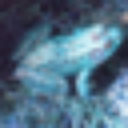

Actual:  frog [6]
Predicted:  bird 2


In [20]:
# SANITY CHECK TO CONFIRM MISCLASSIFIED 

from google.colab.patches import cv2_imshow
import cv2

# SET THIS VALUE TO CHANGE INDEX OF X_TEST & Y_TEST
INDEX = 19

classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

pre = np.argmax(f_resnet.predict(x_test[0:500]), 1) # Predicted Value (0-500)
xx = cv2.resize(x_test[INDEX], (128,128))
cv2_imshow(xx)
print("Actual: ", classes[y_test[INDEX][0]],  y_test[INDEX])
print("Predicted: ", classes[pre[INDEX]], pre[INDEX])

In [0]:
np.argmax(preds)

9

In [0]:
#@title
import keras.backend as K
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image

xp = preprocess_input(x_test[11:12])
#xp = x_test[11:12]
preds = f_resnet.predict(xp)
class_idx = np.argmax(preds[0])
class_output = f_resnet.output[:, class_idx]



grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([f_resnet.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([xp])
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

In [0]:
#@title
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

In [0]:
# Save Images + GradCAM to Gdrive
import keras.backend as K
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image

base_path = '/content/HM/'

last_conv_layer = resnet18.get_layer("stage4_unit2_conv2")

#INDEX_IMG = 6

for INDEX_IMG in misclassified_list:

    xp = preprocess_input(Xtr[INDEX_IMG:INDEX_IMG+1])
    preds = resnet18.predict(xp)
    class_idx = np.argmax(preds[0])
    class_output = resnet18.output[:, class_idx]

    grads = K.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([resnet18.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([xp])
    for i in range(512):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    from google.colab.patches import cv2_imshow
    img = x_test[INDEX_IMG]
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.6, 0)

    img = cv2.resize(img, (128,128))
    superimposed_img = cv2.resize(superimposed_img, (128,128))
    
    os.mkdir(base_path + str(INDEX_IMG))
    
    cv2.imwrite(base_path + str(INDEX_IMG) + '/1.jpg', img)
    cv2.imwrite(base_path + str(INDEX_IMG) + '/2.jpg', superimposed_img)

#     cv2_imshow(img)
#     cv2_imshow(superimposed_img)

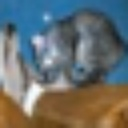

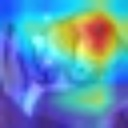

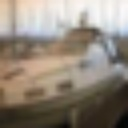

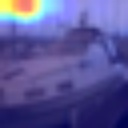

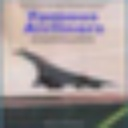

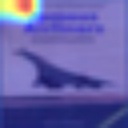

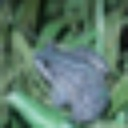

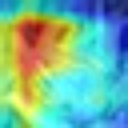

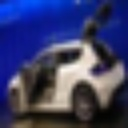

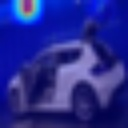

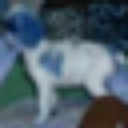

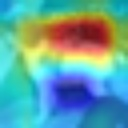

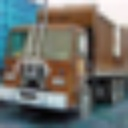

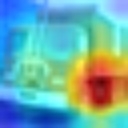

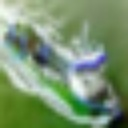

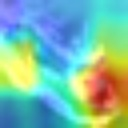

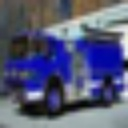

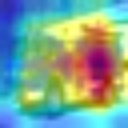

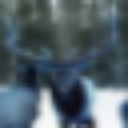

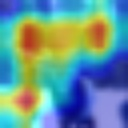

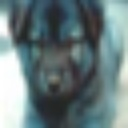

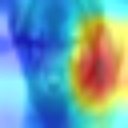

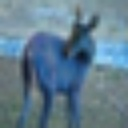

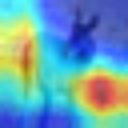

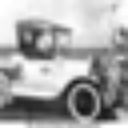

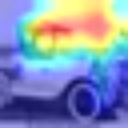

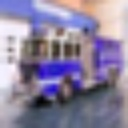

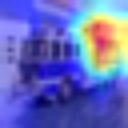

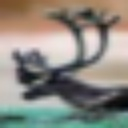

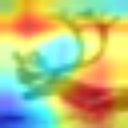

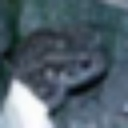

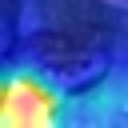

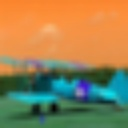

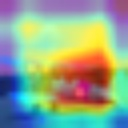

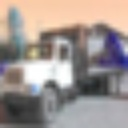

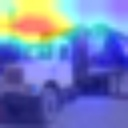

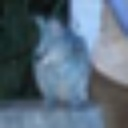

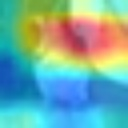

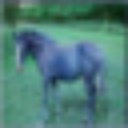

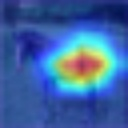

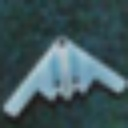

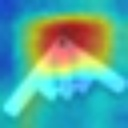

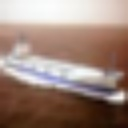

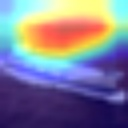

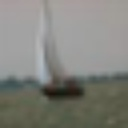

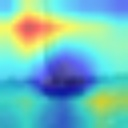

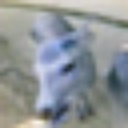

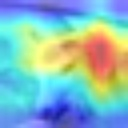

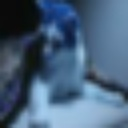

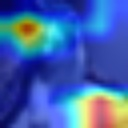

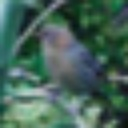

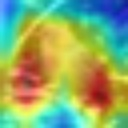

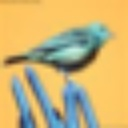

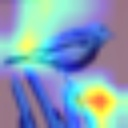

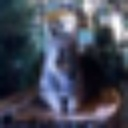

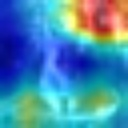

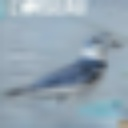

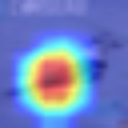

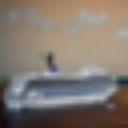

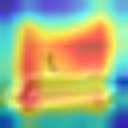

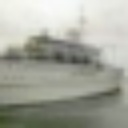

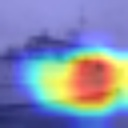

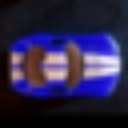

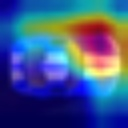

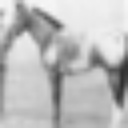

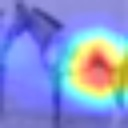

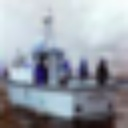

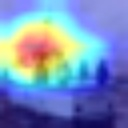

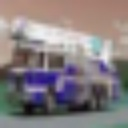

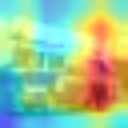

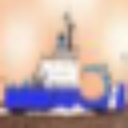

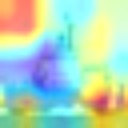

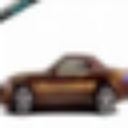

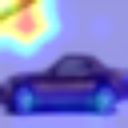

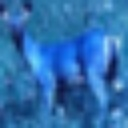

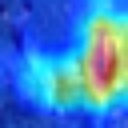

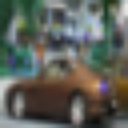

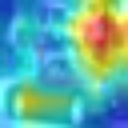

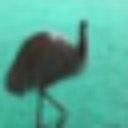

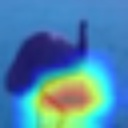

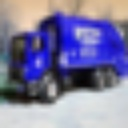

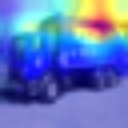

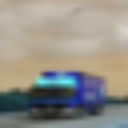

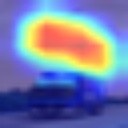

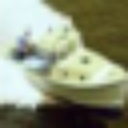

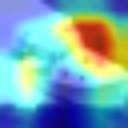

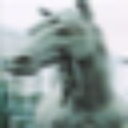

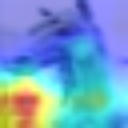

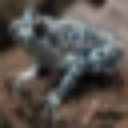

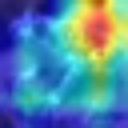

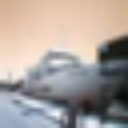

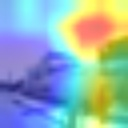

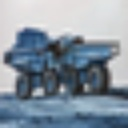

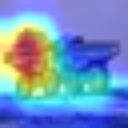

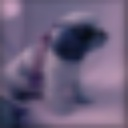

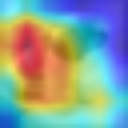

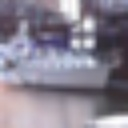

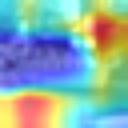

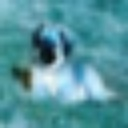

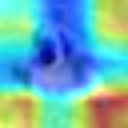

In [24]:
from IPython.display import Image, display
for i in misclassified_list[:50]:
    display(Image('HM/' + str(i) + '/' + '1.jpg'))
    display(Image('HM/' + str(i) + '/' + '2.jpg'))

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
